# Importing Libraries

In [9]:
import pandas as pd
import seaborn as sns
import numpy as np 

# Classification Models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Clustering Models
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Preparing Data 

In [47]:
df = pd.read_csv(r"C:\Users\ADMIN\Downloads\IRIS.csv")
df


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [68]:
X = df.drop('species', axis = 1)
y = df['species']

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 42)

## Exploratory Data Analysis

In [53]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [55]:
df.corr(numeric_only = True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<Axes: xlabel='sepal_length', ylabel='petal_length'>

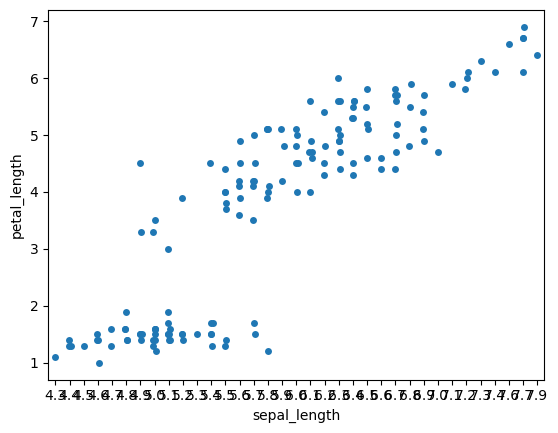

In [59]:
sns.stripplot(x ="sepal_length", y = "petal_length", data = df)

<Axes: xlabel='species', ylabel='petal_length'>

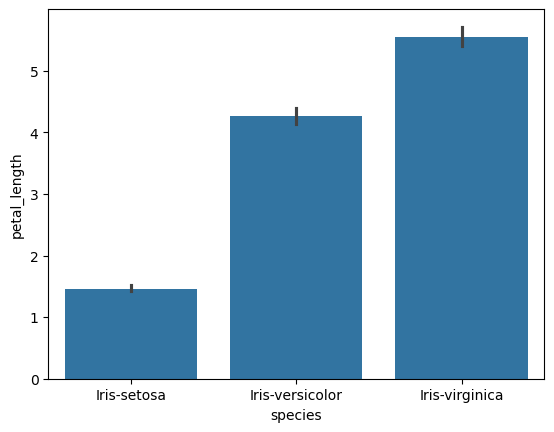

In [63]:
sns.barplot(x = "species", y = "petal_length", data = df)

# Training Model

In [71]:
classification_model = RandomForestClassifier(random_state = 42)
classification_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

# Evaluation

In [80]:
y_pred = classification_model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



In [84]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)